In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def radial(x0,X,tau):
    return np.exp(np.sum((X-x0)**2,axis=1)/(-2*tau*tau))

In [3]:
def localRegression(x0,X,Y,tau):
    x0 = np.r_[1,x0] #concatinate
    X = np.c_[np.ones(len(X)),X]
    xw = X.T*radial(x0,X,tau)
    beta  = np.linalg.pinv(xw@X)@xw@Y
    return x0@beta

In [4]:
n = 1000
X = np.linspace(-3,3,num=n)
Y = np.log(np.abs(X**2-1)+ 0.5)
X+=np.random.normal(scale=0.1,size=n)
domain = np.linspace(-3,3,num=300)

In [5]:
def plot_lwr(tau):
    predictions = [localRegression(x0,X,Y,tau) for x0 in domain]
    plt.scatter(X,Y,color='blue',alpha=0.3,s=20)
    plt.plot(domain,predictions,color='red',linewidth=3)
    plt.show()

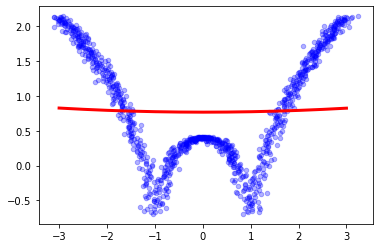

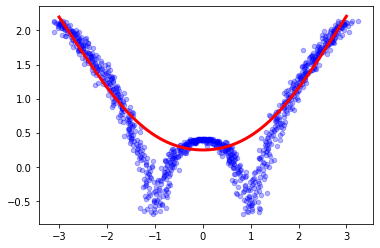

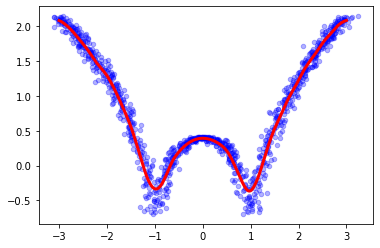

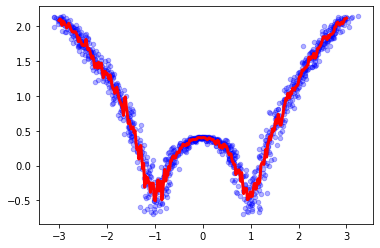

In [6]:
plot_lwr(10.)
plot_lwr(1.)
plot_lwr(0.1)
plot_lwr(0.01)